In [48]:
import geopandas
import pandas as pd
import json
import re
import matplotlib as mplot
import geoplot.crs as gcrs

ModuleNotFoundError: No module named 'geoplot'

In [39]:
europe = geopandas.read_file('world/TM_WORLD_BORDERS-0.3.shp')

In [ ]:
data = pd.

In [40]:
europe

,FIPS,ISO2,ISO3,UN,NAME,AREA,POP2005,REGION,SUBREGION,LON,LAT,geometry
0,AC,AG,ATG,28,Antigua and Barbuda,44,83039,19,29,-61.783,17.078,"(POLYGON ((-61.686668 17.02444100000014, -61.7..."
1,AG,DZ,DZA,12,Algeria,238174,32854159,2,15,2.632,28.163,"POLYGON ((2.96361 36.802216, 2.981389 36.80693..."
2,AJ,AZ,AZE,31,Azerbaijan,8260,8352021,142,145,47.395,40.430,(POLYGON ((45.08332100000001 39.76804400000015...
3,AL,AL,ALB,8,Albania,2740,3153731,150,39,20.068,41.143,"POLYGON ((19.436214 41.021065, 19.450554 41.05..."
4,AM,AM,ARM,51,Armenia,2820,3017661,142,145,44.563,40.534,(POLYGON ((45.57305100000013 40.63248800000008...
5,AO,AO,AGO,24,Angola,124670,16095214,2,17,17.544,-12.296,"(POLYGON ((11.750832 -16.75527999999991, 11.77..."
6,AQ,AS,ASM,16,American Samoa,20,64051,9,61,-170.730,-14.318,"(POLYGON ((-170.542511 -14.29750299999995, -17..."
7,AR,AR,ARG,32,Argentina,273669,38747148,19,5,-65.167,-35.377,(POLYGON ((-68.60861199999994 -54.891395999999...
8,AS,AU,AUS,36,Australia,768230,20310208,9,53,136.189,-24.973,"(POLYGON ((158.882172 -54.711388, 158.87966900..."
9,BA,BH,BHR,48,Bahrain,71,724788,142,145,50.562,26.019,(POLYGON ((50.81249200000013 25.64222000000007...


(35, 70)

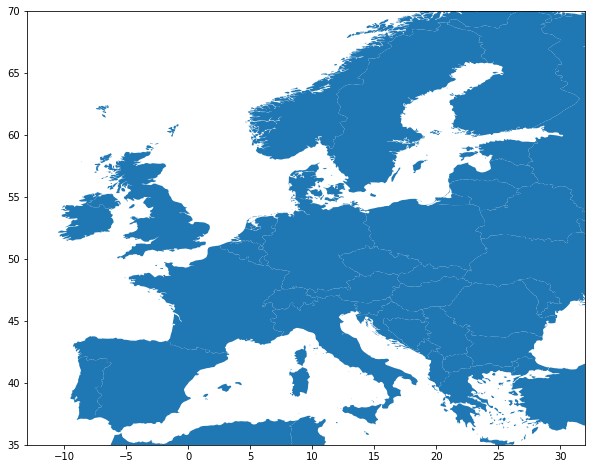

In [70]:
plt = europe.plot(figsize=(10, 10))
mplot.pyplot.xlim(-13,32)
mplot.pyplot.ylim(35, 70)

In [74]:
europe[europe.NAME == 'Iceland']

,FIPS,ISO2,ISO3,UN,NAME,AREA,POP2005,REGION,SUBREGION,LON,LAT,geometry
81,IC,IS,ISL,352,Iceland,10025,295732,150,154,-18.48,64.764,"POLYGON ((-15.070835 66.14360000000001, -15.14..."


In [6]:
for i, row in powiaty.iterrows():
    powiaty.loc[i,'wynik'] = wyniki_na_okreg[row['woj']][row['nr_okregu']]

In [8]:
powiaty['kod_je'] = powiaty.id.apply(lambda x: str(x).zfill(4))

In [22]:
powiaty

,Unnamed: 0,id,mieszkancow,nr_okregu,obwodow,okreg_desc,powiat,woj,wyborcow,wynik,kod_je
0,0,201,86305.0,4,64.0,"miasto: Jelenia Góra, powiaty: bolesławiecki, ...",bolesławiecki,Województwo Dolnośląskie,70517.0,1.36,0201
1,1,202,97643.0,3,80.0,"miasto: Wałbrzych, powiaty: dzierżoniowski, kł...",dzierżoniowski,Województwo Dolnośląskie,81944.0,1.68,0202
2,2,203,85636.0,5,53.0,"miasto: Legnica, powiaty: głogowski, jaworski,...",głogowski,Województwo Dolnośląskie,69904.0,1.15,0203
3,3,204,34532.0,2,23.0,"powiaty: górowski, milicki, oleśnicki, oławski...",górowski,Województwo Dolnośląskie,27969.0,1.51,0204
4,4,205,49703.0,5,39.0,"miasto: Legnica, powiaty: głogowski, jaworski,...",jaworski,Województwo Dolnośląskie,41103.0,1.15,0205
5,5,206,61147.0,4,54.0,"miasto: Jelenia Góra, powiaty: bolesławiecki, ...",jeleniogórski,Województwo Dolnośląskie,50876.0,1.36,0206
6,6,207,42709.0,4,32.0,"miasto: Jelenia Góra, powiaty: bolesławiecki, ...",kamiennogórski,Województwo Dolnośląskie,35495.0,1.36,0207
7,7,208,155087.0,3,135.0,"miasto: Wałbrzych, powiaty: dzierżoniowski, kł...",kłodzki,Województwo Dolnośląskie,130288.0,1.68,0208
8,8,209,53590.0,5,46.0,"miasto: Legnica, powiaty: głogowski, jaworski,...",legnicki,Województwo Dolnośląskie,43206.0,1.15,0209
9,9,210,52997.0,4,40.0,"miasto: Jelenia Góra, powiaty: bolesławiecki, ...",lubański,Województwo Dolnośląskie,44275.0,1.36,0210


In [9]:
def func(x):
    print(x)
    return powiaty[powiaty['kod_je'] == x]["okreg_desc"].iloc[0]

In [23]:
powiaty_gis['desc'] = powiaty_gis.jpt_kod_je.apply(func)

0226
0262
0206
0204
0214
0201
0261
0208
0210
0221
0202
0220
0203
0265
0222
0225
0223
0224
0215
0216
0218
0205
0213
0207
0217
0219
0209
0264
0211
0212
0462
0463
0464
0411
0410
0412
0416
0405
0404
0406
0407
0401
0402
0403
0408
0417
0413
0418
0414
0415
0419
0461
0409
1015
1016
1017
1019
1018
1020
1021
1061
1062
1063
1001
1002
1003
1004
1005
1006
1007
1008
1009
1010
1011
1012
1013
1014
0601
0602
0603
0604
0605
0606
0607
0608
0609
0610
0611
0612
0613
0614
0615
0616
0617
0618
0661
0619
0620
0663
0662
0664
0811
0812
0862
0861
0801
0802
0809
0803
0804
0805
0806
0807
0808
0810
1201
1203
1204
1205
1206
1207
1208
1209
1210
1211
1212
1213
1214
1215
1216
1217
1218
1263
1219
1261
1262
1202
1411
1463
1410
1438
1414
1461
1465
1415
1416
1417
1418
1419
1420
1421
1422
1423
1412
1413
1424
1464
1425
1426
1427
1429
1428
1430
1432
1433
1462
1401
1402
1403
1404
1405
1406
1407
1436
1408
1409
1434
1435
1437
1607
1608
1611
1661
1602
1605
1601
1606
1610
1603
1604
1609
1812
1813
1814
1815
1816
1818
1819
1820
1821


/home/pawel/.virtualenvs/jup/lib/python3.6/site-packages/pysal/__init__.py:65: VisibleDeprecationWarning: PySAL's API will be changed on 2018-12-31. The last release made with this API is version 1.14.4. A preview of the next API version is provided in the `pysal` 2.0 prelease candidate. The API changes and a guide on how to change imports is provided at https://pysal.org/about
  ), VisibleDeprecationWarning)


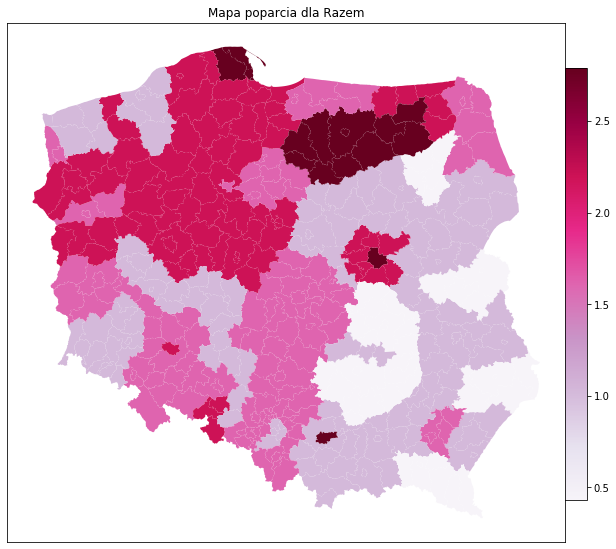

In [12]:
c_map = 'PuRd'
column = 'w'
plt = powiaty_gis.plot(column=column, scheme='equal_interval', cmap=c_map, figsize=(10, 10))

plt.get_xaxis().set_visible(False)
plt.get_yaxis().set_visible(False)
plt.set_title("Mapa poparcia dla Razem".format(column))
sm = mplot.cm.ScalarMappable(cmap=c_map, norm=mplot.colors.Normalize(vmin=wyniki_na_okreg.min(), vmax=wyniki_na_okreg.max()))
sm._A = []
fig = plt.get_figure()
cax = fig.add_axes([0.9, 0.2, 0.03, 0.6])
fig.colorbar(sm, cax=cax)

In [48]:
x = wyniki[wyniki.nr_listy == 6].groupby(['woj', 'okreg'])['%'].sum() 
x= x.sort_values(ascending=True)
x.head(5)


woj                         okreg
Województwo świętokrzyskie  4        0.43
                            3        0.64
Województwo Lubelskie       3        0.64
Województwo Podkarpackie    5        0.76
Województwo Podlaskie       3        0.85
Name: %, dtype: float64

In [60]:
242511 / 549

441.73224043715845

In [51]:
wyniki
x = wyniki[wyniki.nr_listy == 6].groupby(['woj', 'okreg'])['%'].sum() 
x= x.sort_values(ascending=True)
x.head(10)


woj                         okreg
Województwo świętokrzyskie  4        0.43
                            3        0.64
Województwo Lubelskie       3        0.64
Województwo Podkarpackie    5        0.76
Województwo Podlaskie       3        0.85
Województwo Lubelskie       5        0.86
Województwo Mazowieckie     5        0.88
Województwo świętokrzyskie  1        0.89
Województwo Małopolskie     6        0.93
Województwo Lubelskie       2        0.94
Name: %, dtype: float64

In [53]:
wyniki[wyniki.woj == 'Województwo Mazowieckie'][wyniki.nr_listy == 6].groupby(['woj', 'okreg'])['%'].sum()

/home/pawel/.virtualenvs/jup/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


woj                      okreg
Województwo Mazowieckie  1        2.79
                         2        2.31
                         3        2.29
                         4        0.99
                         5        0.88
                         6        0.95
                         7        1.95
Name: %, dtype: float64

In [59]:
powiaty[powiaty.woj == 'Województwo Mazowieckie'][powiaty.nr_okregu == 5].okreg_desc.iloc[0]

/home/pawel/.virtualenvs/jup/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


'miasto Radom; powiaty: białobrzeski, grójecki, kozienicki, lipski, przysuski, radomski, szydłowiecki, zwoleński'